In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
#Load dataset

df = pd.read_csv('/content/Covid19.csv')

In [ ]:
df.head(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
df.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [ ]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [ ]:
df.nunique()

,0
Country/Region,187
Confirmed,184
Deaths,150
Recovered,178
Active,173
New cases,122
New deaths,38
New recovered,103
Deaths / 100 Cases,145
Recovered / 100 Cases,177


In [ ]:
df.isnull().sum()

,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [ ]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [ ]:
fig1 = px.histogram(
                  df,
                   x='Confirmed',
                   nbins=30,
                   color_discrete_sequence=['#1f77b4'])


fig2 = px.histogram(
                   df,
                   x='Deaths',
                   nbins=30,
                   color_discrete_sequence=['#1f77b4'])

fig3 = px.histogram(
                   df,
                   x='Recovered',
                   nbins=30,
                   color_discrete_sequence=['#1f77b4'])
fig1.show()
fig2.show()
fig3.show()

In [ ]:
#Check outliers from the dataset

def outliers(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

len_outliers = {}

for i in df.select_dtypes(include=np.number).columns:
  outliers_iqr = outliers(df, i)
  len_outliers[i] = len(outliers_iqr)

len_outliers

{'Confirmed': 24,
 'Deaths': 33,
 'Recovered': 25,
 'Active': 32,
 'New cases': 25,
 'New deaths': 28,
 'New recovered': 31,
 'Deaths / 100 Cases': 10,
 'Recovered / 100 Cases': 0,
 'Deaths / 100 Recovered': 18,
 'Confirmed last week': 23,
 '1 week change': 22,
 '1 week % increase': 8}

##4.	Make visiualizations top 5 countries as certain columns:
4.1	Top 5 Confirmes columns

4.2	Top 5 Death columns

4.3	Top 5 Recover columns

4.4	Top 5 Active columns


In [ ]:
top_5_confirmed = df[['Country/Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False).head(5)
top_5_deaths = df[['Country/Region', 'Deaths']].sort_values(by='Deaths', ascending=False).head(5)
top_5_recovered = df[['Country/Region', 'Recovered']].sort_values(by='Recovered', ascending=False).head(5)
top_5_active = df[['Country/Region', 'Active']].sort_values(by='Active', ascending=False).head(5)

In [ ]:
fig_confirmed = px.bar(top_5_confirmed, x='Country/Region', y='Confirmed',
                      title='Top 5 Countries/Regions by Confirmed COVID-19 Cases',
                      labels={'Confirmed': 'Confirmed Cases'},
                      color='Confirmed',
                      color_continuous_scale='Blues')

fig_deaths = px.bar(top_5_deaths, x='Country/Region', y='Deaths',
                    title='Top 5 Countries/Regions by Deaths due to COVID-19',
                    labels={'Deaths': 'Deaths'},
                    color='Deaths',
                    color_continuous_scale='Reds')

fig_recovered = px.bar(top_5_recovered, x='Country/Region', y='Recovered',
                       title='Top 5 Countries/Regions by Recovered COVID-19 Cases',
                       labels={'Recovered': 'Recovered Cases'},
                       color='Recovered',
                       color_continuous_scale='Greens')

fig_active = px.bar(top_5_active, x='Country/Region', y='Active',
                    title='Top 5 Countries/Regions by Active COVID-19 Cases',
                    labels={'Active': 'Active Cases'},
                    color='Active',
                    color_continuous_scale='Purples')

fig_confirmed.show()
fig_deaths.show()
fig_recovered.show()
fig_active.show()

##5.	Make visiualizations last 5 countries as certain columns:

5.1	Last 5 Confirmes columns

5.2	Last 5 Death columns

5.3	Last 5 Recover columns

5.4	Last 5 Active columns


In [ ]:
last_5_confirmed = df[['Country/Region', 'Confirmed']].sort_values(by='Confirmed', ascending=True).tail(5)
last_5_deaths = df[['Country/Region', 'Deaths']].sort_values(by='Deaths', ascending=True).tail(5)
last_5_recovered = df[['Country/Region', 'Recovered']].sort_values(by='Recovered', ascending=True).tail(5)
last_5_active = df[['Country/Region', 'Active']].sort_values(by='Active', ascending=True).tail(5)




In [ ]:
fig_last_5_confirmed = px.bar(last_5_confirmed, x='Country/Region', y='Confirmed',
                              title='Last 5 Countries/Regions by Confirmed COVID-19 Cases',
                              labels={'Confirmed': 'Confirmed Cases'},
                              color='Confirmed',
                              color_continuous_scale='Blues')

fig_last_5_deaths = px.bar(last_5_deaths, x='Country/Region', y='Deaths',
                            title='Last 5 Countries/Regions by Deaths due to COVID-19',
                            labels={'Deaths': 'Deaths'},
                            color='Deaths',
                            color_continuous_scale='Reds')

fig_last_5_recovered = px.bar(last_5_recovered, x='Country/Region', y='Recovered',
                               title='Last 5 Countries/Regions by Recovered COVID-19 Cases',
                               labels={'Recovered': 'Recovered Cases'},
                               color='Recovered',
                               color_continuous_scale='Greens')

fig_last_5_active = px.bar(last_5_active, x='Country/Region', y='Active',
                            title='Last 5 Countries/Regions by Active COVID-19 Cases',
                            labels={'Active': 'Active Cases'},
                            color='Active',
                            color_continuous_scale='Purples')

fig_last_5_confirmed.show()
fig_last_5_deaths.show()
fig_last_5_recovered.show()
fig_last_5_active.show()

##6.	Make visiualizations top 5 Region as certain columns:

6.1	Last 5 Confirmes columns

6.2	Last 5 Death columns

6.3	Last 5 Recover columns

6.4	Last 5 Active columns


In [ ]:

top_5_regions_confirmed = df[['WHO Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False).head(5)
top_5_regions_deaths = df[['WHO Region', 'Deaths']].sort_values(by='Deaths', ascending=False).head(5)
top_5_regions_recovered = df[['WHO Region', 'Recovered']].sort_values(by='Recovered', ascending=False).head(5)
top_5_regions_active = df[['WHO Region', 'Active']].sort_values(by='Active', ascending=False).head(5)



fig_top_5_regions_confirmed = px.bar(top_5_regions_confirmed, x='WHO Region', y='Confirmed',
                                     title='Top 5 Regions by Confirmed COVID-19 Cases',
                                     labels={'Confirmed': 'Confirmed Cases'},
                                     color='Confirmed', color_continuous_scale='Blues')

fig_top_5_regions_deaths = px.bar(top_5_regions_deaths, x='WHO Region', y='Deaths',
                                  title='Top 5 Regions by Deaths due to COVID-19',
                                  labels={'Deaths': 'Deaths'},
                                  color='Deaths', color_continuous_scale='Reds')

fig_top_5_regions_recovered = px.bar(top_5_regions_recovered, x='WHO Region', y='Recovered',
                                     title='Top 5 Regions by Recovered COVID-19 Cases',
                                     labels={'Recovered': 'Recovered Cases'},
                                     color='Recovered', color_continuous_scale='Greens')

fig_top_5_regions_active = px.bar(top_5_regions_active, x='WHO Region', y='Active',
                                  title='Top 5 Regions by Active COVID-19 Cases',
                                  labels={'Active': 'Active Cases'},
                                  color='Active', color_continuous_scale='Purples')



fig_top_5_regions_confirmed.show()
fig_top_5_regions_deaths.show()
fig_top_5_regions_recovered.show()
fig_top_5_regions_active.show()




##7.	Make visiualizations last 5 Region as certain columns:

7.1	Last 5 Confirmes columns

7.2	Last 5 Death columns

7.3	Last 5 Recover columns

7.4	Last 5 Active columns


In [ ]:
last_5_regions_confirmed = df[['WHO Region', 'Confirmed']].sort_values(by='Confirmed', ascending=True).tail(5)
last_5_regions_deaths = df[['WHO Region', 'Deaths']].sort_values(by='Deaths', ascending=True).tail(5)
last_5_regions_recovered = df[['WHO Region', 'Recovered']].sort_values(by='Recovered', ascending=True).tail(5)
last_5_regions_active = df[['WHO Region', 'Active']].sort_values(by='Active', ascending=True).tail(5)





In [ ]:
fig_last_5_regions_confirmed = px.bar(last_5_regions_confirmed, x='WHO Region', y='Confirmed',
                                      title='Last 5 Regions by Confirmed COVID-19 Cases',
                                      labels={'Confirmed': 'Confirmed Cases'},
                                      color='Confirmed', color_continuous_scale='Blues')

fig_last_5_regions_deaths = px.bar(last_5_regions_deaths, x='WHO Region', y='Deaths',
                                   title='Last 5 Regions by Deaths due to COVID-19',
                                   labels={'Deaths': 'Deaths'},
                                   color='Deaths', color_continuous_scale='Reds')

fig_last_5_regions_recovered = px.bar(last_5_regions_recovered, x='WHO Region', y='Recovered',
                                      title='Last 5 Regions by Recovered COVID-19 Cases',
                                      labels={'Recovered': 'Recovered Cases'},
                                      color='Recovered', color_continuous_scale='Greens')

fig_last_5_regions_active = px.bar(last_5_regions_active, x='WHO Region', y='Active',
                                   title='Last 5 Regions by Active COVID-19 Cases',
                                   labels={'Active': 'Active Cases'},
                                   color='Active', color_continuous_scale='Purples')

fig_last_5_regions_confirmed.show()
fig_last_5_regions_deaths.show()
fig_last_5_regions_recovered.show()
fig_last_5_regions_active.show()

In [ ]:
import plotly.express as px

top_growth_plotly = df[['Country/Region', '1 week % increase', 'WHO Region']].sort_values(by='1 week % increase', ascending=False).head(10)

fig_top_growth = px.bar(top_growth_plotly,
                        x='1 week % increase',
                        y='Country/Region',
                        title='Top 10 Countries with the Highest 1-Week % Increase in COVID-19 Cases',
                        labels={'1 week % increase': '1-Week % Increase in Cases', 'Country/Region': 'Country/Region'},
                        color='1 week % increase',
                        color_continuous_scale='Viridis')

fig_top_growth.show()

region_growth_plotly = df.groupby('WHO Region')['1 week % increase'].mean().sort_values(ascending=False)

fig_region_growth = px.bar(region_growth_plotly,
                           x=region_growth_plotly.index,
                           y=region_growth_plotly.values,
                           title='Average 1-Week % Increase in COVID-19 Cases by Region',
                           labels={'x': 'WHO Region', 'y': 'Average 1-Week % Increase'},
                           color=region_growth_plotly.values,
                           color_continuous_scale='Viridis')

fig_region_growth.show()


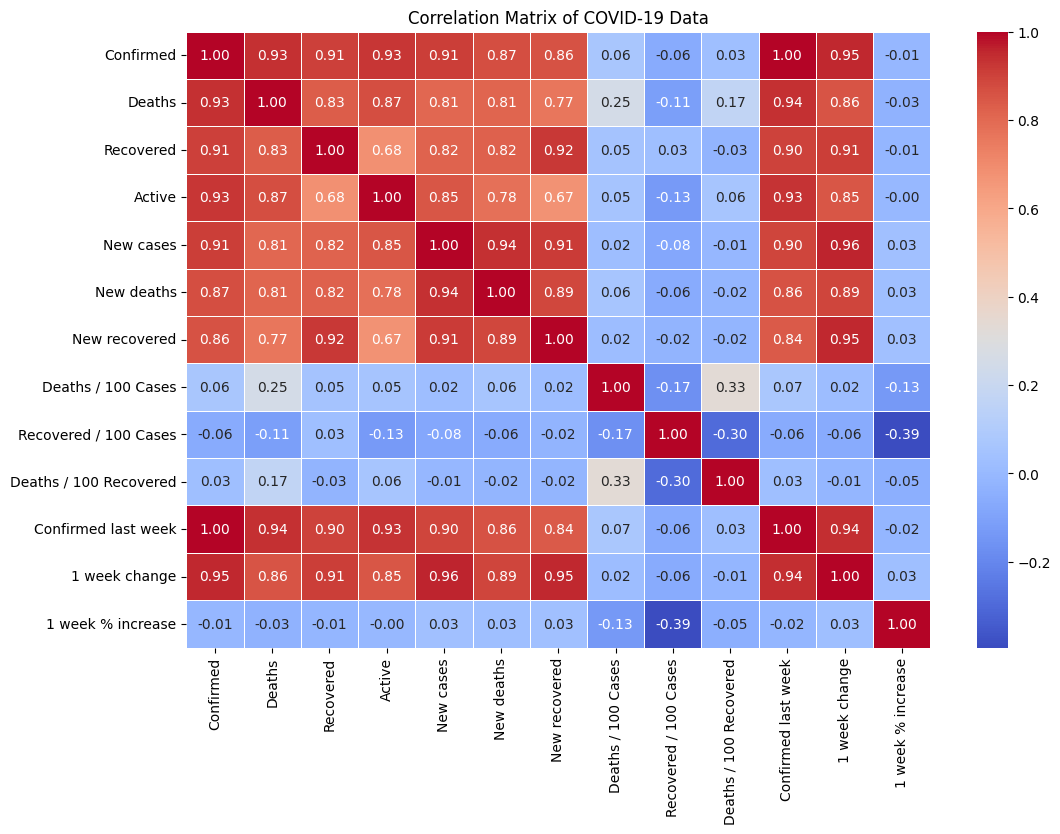

In [ ]:
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
                         'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases',
                         'Deaths / 100 Recovered', 'Confirmed last week', '1 week change',
                         '1 week % increase']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of COVID-19 Data')
plt.show()
